In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 ## 1. Problem Understanding (Business Understanding)

**What is Churn?**
- Churn is the measure of how many customers stop using a product. 
- This can be measured based on actual usage or failure to renew (when the product is sold using a subscription model). 
- Often evaluated for a specific period of time, there can be a monthly, quarterly, or annual churn rate.



**Predicting Churn?**
- Churn prediction means detecting which customers are likely to leave a service or to cancel a subscription to a service. 
- It is a critical prediction for many businesses because acquiring new clients often costs more than retaining existing ones. 
- Once you can identify those customers that are at risk of cancelling, you should know exactly what marketing action to take for each individual customer to maximise the chances that the customer will remain.

We aim to accomplish the following for this study:

1. Identify and visualize which factors contribute to customer churn:
    
2. Build a prediction model that will perform the following:
    * Classify if a customer is going to churn or not
    * Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn

## 2. Data Understanding (Data Set Review)

In this section we will seek to explore the structure of our data: 
1. To understand the input space the data set
2. Grab a solid understanding about each feature/field's definition that we have

In [ ]:
## REQUIRED LIBRARIES

# For data wrangling 
import numpy as np
import pandas as pd
import io

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Menentukan jumlah kolom dan baris yang ditampilkan dataframe
pd.options.display.max_rows = 30
pd.options.display.max_columns = 20

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
# # gunakan cell ini ketika mengeksekusi di local computer
# # pastikan notebook dan data berada dalam satu folder yang sama
# df = pd.read_csv("Churn_Modelling.csv")

In [ ]:
# Connect to google drive
# Gunakan cell ini ketika mengeksekusi notebook via google colab
# from google.colab import drive
# drive.mount('/content/drive')

# Pastikan teman teman menyimpan dataset di gdirive teman teman di folder Digital Skola/DS Batch 21/Data Science Project - Churn Prediction/Churn_Modelling.csv
# df = pd.read_csv('/content/drive/MyDrive/Digital Skola/DS Batch 21/Data Science Project - Churn Prediction/Churn_Modelling.csv')
df = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']))
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

The Df has 1000 rows with 14 attributes.

The aim is to use this dataset to predict whether a bank's customers leave the bank or not. If the Client has closed his/her bank account, he/she has left.
- **RowNumber:** corresponds to the record (row) number and has no effect on the output.
- **CustomerId:** contains random values and has no effect on customer leaving the bank.
- **Surname:** the surname of a customer has no impact on their decision to leave the bank.
- **CreditScore:** can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- **Geography:** a customer’s location can affect their decision to leave the bank.
- **Gender:** it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- **Age:** this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- **Tenure:** refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- **Balance:** also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- **NumOfProducts:** refers to the number of products that a customer has purchased through the bank.
- **HasCrCard:** denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- **IsActiveMember:** active customers are less likely to leave the bank.
- **EstimatedSalary:** as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- **Exited:** whether or not the customer left the bank.  (0=No,1=Yes)

In [ ]:
# Check columns list and missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Our data has no missing values

In [ ]:
# Get unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

The result indicates that we don't need the 2 first fields, RowNumber and CustomerId. Those are the ID that attaches uniquely to the customer. It will not give any effect to our customer behaviour since it is only unique identifier.

We also don't need surname. Surname should have no any direct relationship to our customer's behaviour. It means that specific surname doesn't indicate any specific behaviour that will affect their churn rate.

Hence, let's drop these unused columns.

In [ ]:
# Drop the columns as explained above
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [ ]:
# Review the top rows of what is left of the data frame
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Check statistical description (numerical)
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# Check statistical description (categorical)
df.describe(include = 'object')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [ ]:
# Check variable data types
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## 3. Exploratory Data Analysis

Since we are talking about churn prediction that is part of `binary classification` and part of the supervised machine learning that has label, then when doing exploratory analysis, we can focus to get an understanding as to how the given attributes relate too the 'Exit' status (label data).

## Features vs Targets

So about 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn.
Given 20% is a small number,  we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

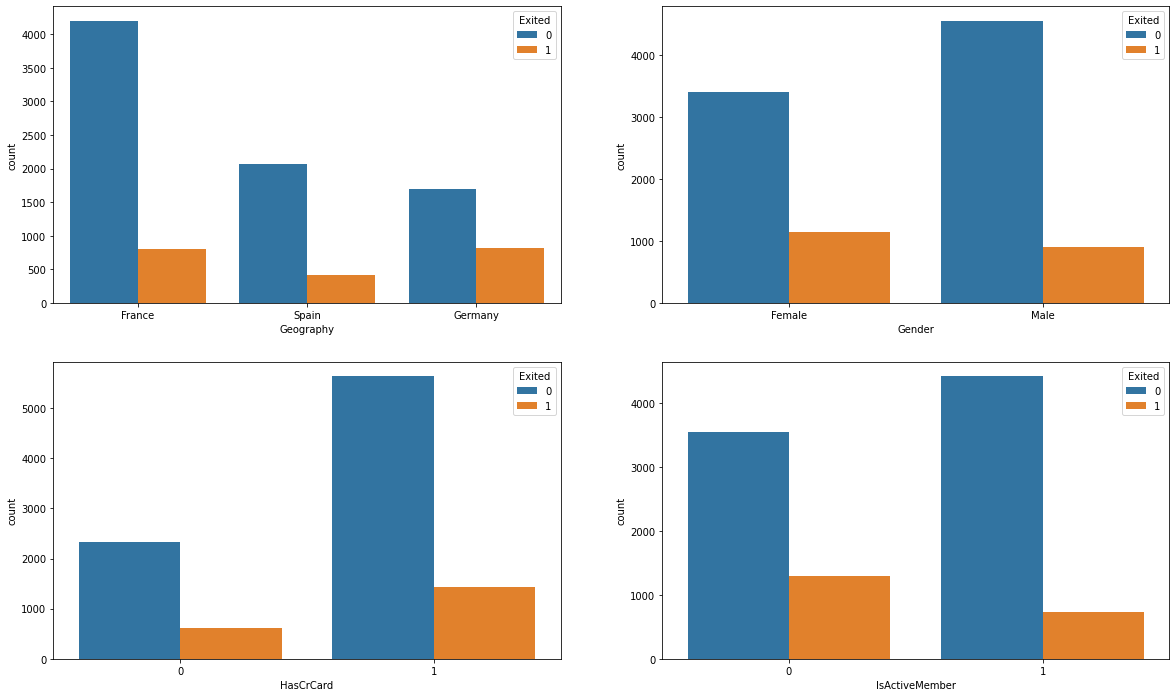

In [ ]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

We note the following:
* Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.
* The proportion of female customers churning is also greater than that of male customers
* Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence. 
* Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.


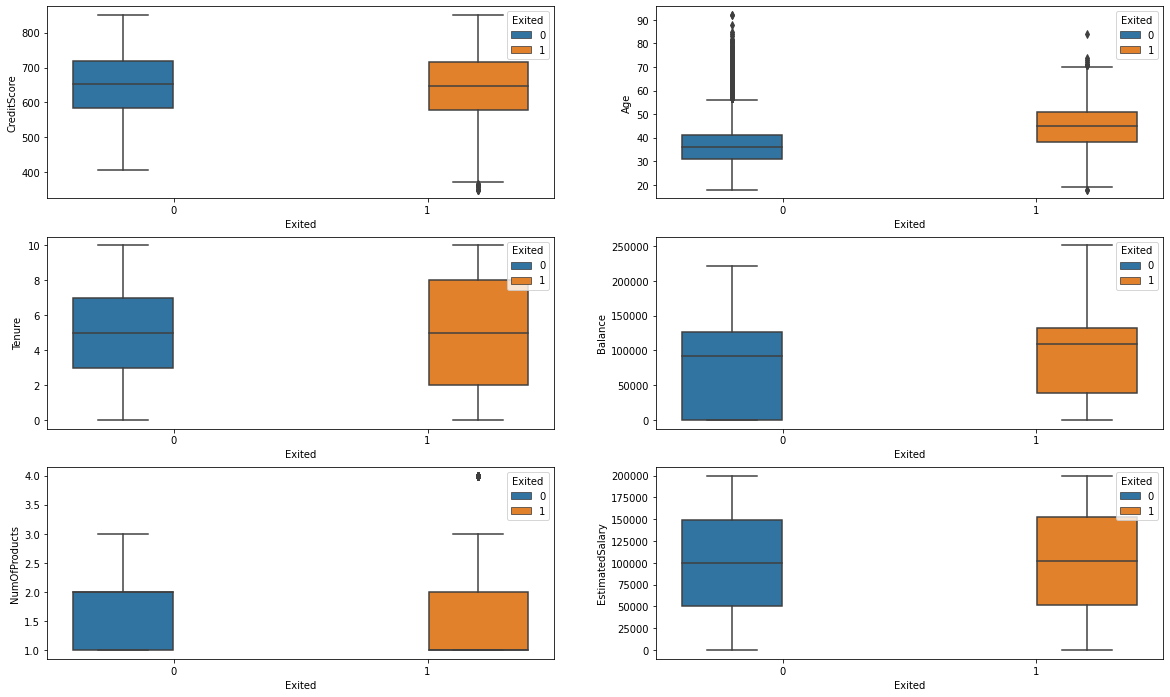

In [ ]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

We note the following:
* There is no significant difference in the credit score distribution between retained and churned customers. 
* The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups
* With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
*  Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
* Neither the product nor the salary has a significant effect on the likelihood to churn.

### Correlation Matrix

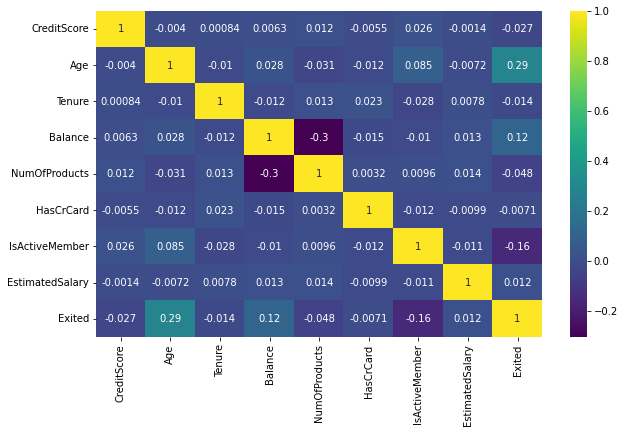

In [ ]:
# Exited correlation matrix
cm = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

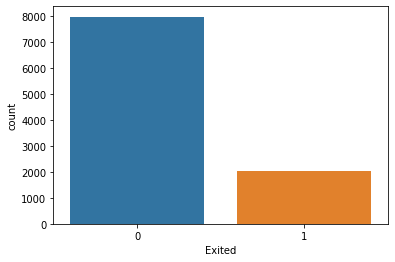

In [ ]:
sns.countplot(x='Exited' ,data = df)

## 4. Feature engineering
We seek to add features that are likely to have an impact on the probability of churning. We first split the train and test sets

In [ ]:
df_fe = df.copy()

In [ ]:
# Balance Salary Ratio
df_fe['BalanceSalaryRatio'] = df_fe["Balance"]/df_fe["EstimatedSalary"]

# Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:
df_fe['TenureByAge'] = df_fe["Tenure"]/(df_fe["Age"])

# Credit score given age to take into account credit behaviour visavis adult life
df_fe['CreditScoreGivenAge'] = df_fe["CreditScore"]/(df_fe["Age"])

In [ ]:
# Resulting Data Frame
df_fe.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442


## 5. Data preparation for model fitting

After having some solid understanding about the data by exploring them, we now need to prepare our dataset to be ready to be modelled. In this section we will see if the data has missing values, duplicated values, unnecessary fields. After doing this step, we expect that our data only contains fields that we want to explore further, has no missing values, and if there is any duplicated values, it is expected as business requirement.

In [ ]:
# One hot encode the categorical variables
from sklearn.preprocessing import OneHotEncoder
lst = ['Geography', 'Gender']
ohe = OneHotEncoder()
ohe.fit(df_fe[lst])
df_ohe_res = pd.DataFrame(ohe.transform(df_fe[lst]).toarray(), 
                          columns = ohe.get_feature_names_out())
df_fe = pd.concat([df_fe, df_ohe_res], axis=1)
df_fe.drop(columns=lst, inplace=True)
df_fe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442,0.0,0.0,1.0,1.0,0.0


In [ ]:
# minMax scaling the continuous variables
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(df_fe)
df_fe = pd.DataFrame(mm.transform(df_fe), columns=df_fe.columns)

df_fe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.000000,0.085714,0.235083,1.0,0.0,0.0,1.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.000070,0.043902,0.237252,0.0,0.0,1.0,1.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.000132,0.342857,0.168807,1.0,0.0,0.0,1.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,0.000000,0.046154,0.310859,1.0,0.0,0.0,1.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.000150,0.083721,0.354739,0.0,0.0,1.0,1.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

# Split Train, test data
X = df_fe.drop(columns=["Exited"]).copy()
y = df_fe["Exited"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42)
print(len(X_train))
print(len(X_test))

7500
2500


## 6. Model fitting and selection
For the model fitting, I will try out the following
* Logistic regression
* KNN
* Ensemble models

In [ ]:
# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

### Fit best Models

In [ ]:
# Fit logistic regression
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Fit KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Fit Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

### Review best model fit accuracy

In [ ]:
y_pred_log = log.predict(X_test)
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      2003
         1.0       0.58      0.21      0.31       497

    accuracy                           0.81      2500
   macro avg       0.70      0.59      0.60      2500
weighted avg       0.78      0.81      0.78      2500



In [ ]:
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      2003
         1.0       0.56      0.30      0.39       497

    accuracy                           0.81      2500
   macro avg       0.70      0.62      0.64      2500
weighted avg       0.79      0.81      0.79      2500



In [ ]:
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      2003
         1.0       0.76      0.47      0.58       497

    accuracy                           0.87      2500
   macro avg       0.82      0.72      0.75      2500
weighted avg       0.86      0.87      0.85      2500



In [ ]:
def get_auc_scores(y_actual, y_pred, y_proba):
    auc_score = roc_auc_score(y_actual, y_pred); 
    fpr_df, tpr_df, _ = roc_curve(y_actual,  y_proba); 
    return (auc_score, fpr_df, tpr_df)

In [ ]:

auc_log, fpr_log, tpr_log = get_auc_scores(y, 
                                           log.predict(X),
                                           log.predict_proba(X)[:,1])
auc_knn, fpr_knn, tpr_knn = get_auc_scores(y, 
                                           knn.predict(X),
                                           knn.predict_proba(X)[:,1])
auc_rf, fpr_rf, tpr_rf = get_auc_scores(y, 
                                        rf.predict(X),
                                        rf.predict_proba(X)[:,1])

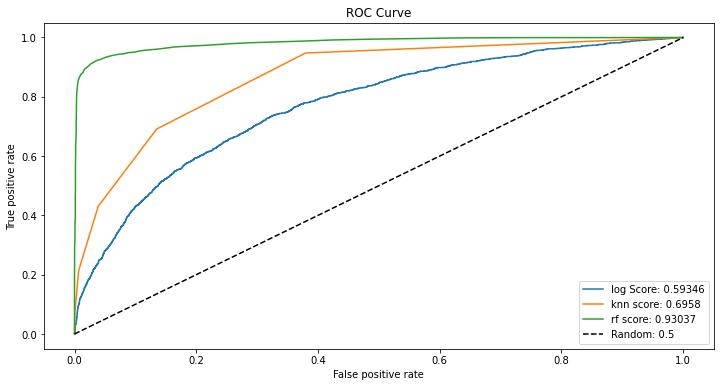

In [ ]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log, tpr_log, label = 'log Score: ' + str(round(auc_log, 5)))
plt.plot(fpr_knn, tpr_knn, label = 'knn score: ' + str(round(auc_knn, 5)))
plt.plot(fpr_rf, tpr_rf, label = 'rf score: ' + str(round(auc_rf, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

### Resampling to handle imbalanced dataset

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

0.0    5960
1.0    1540
Name: Exited, dtype: int64

In [ ]:
y_smote.value_counts()

1.0    5960
0.0    5960
Name: Exited, dtype: int64

In [ ]:
# Fit Random Forest classifier
rf_smote = RandomForestClassifier()
rf_smote.fit(X_smote, y_smote)

RandomForestClassifier()

In [ ]:
y_pred_smote = rf_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      2003
         1.0       0.59      0.60      0.60       497

    accuracy                           0.84      2500
   macro avg       0.75      0.75      0.75      2500
weighted avg       0.84      0.84      0.84      2500



### Feature Importance

<BarContainer object of 16 artists>

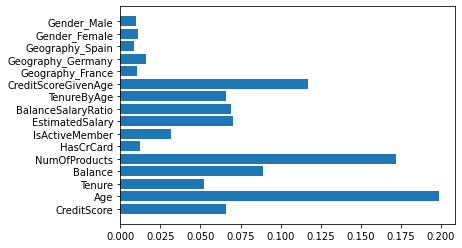

In [ ]:
fi = rf_smote.feature_importances_
col = X_train.columns
plt.barh(col, fi)

In [ ]:
df.groupby("Exited")["Age"].mean()

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64

In [ ]:
pd.crosstab(df["NumOfProducts"], df["Exited"])

Exited,0,1
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60


## 6. Homework

Setelah mempelajari 3 Model di atas, sekarang buatlah 3 model lain untuk memprediksi dataset yang sama. Lakukan eksplorasi lebih mendalam terhadap data set yang diberikan.

Tiga model yang perlu teman-teman buat adalah:
1. Gradient Boosting Model
2. SVM model
3. Tentukan sendiri

Dari ketiga model tersebut, ambillah kesimpulan dari hasil kerja teman-teman model mana yang terbaik.

Notes: Poin yang dinilai adalah code, eksplorasi, kreativitas, dan ketepatan pengiriman tugas.

### Import Lib

In [304]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# fit model
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Scoring functions
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_auc_score, accuracy_score,f1_score, \
precision_score, recall_score

- SVC
- GradientBoostingClassifier
- MLPClassifier

In [305]:
# from google.colab import files
# uploaded = files.upload()

In [306]:
df = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']))
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The aim is to use this dataset to predict whether a bank's customers leave the bank or not. If the Client has closed his/her bank account, he/she has left.
- **RowNumber:** corresponds to the record (row) number and has no effect on the output.
- **CustomerId:** contains random values and has no effect on customer leaving the bank.
- **Surname:** the surname of a customer has no impact on their decision to leave the bank.
- **CreditScore:** can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- **Geography:** a customer’s location can affect their decision to leave the bank.
- **Gender:** it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- **Age:** this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- **Tenure:** refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- **Balance:** also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- **NumOfProducts:** refers to the number of products that a customer has purchased through the bank.
- **HasCrCard:** denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- **IsActiveMember:** active customers are less likely to leave the bank.
- **EstimatedSalary:** as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- **Exited:** whether or not the customer left the bank.  (0=No,1=Yes)

- RowNumber, Customer ID, Surname tidak diperlukan karena tidak mempengaruhi churn atau tidaknya suatu pelanggan

In [307]:
# Drop the columns as explained above
df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1, inplace=True)

In [308]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [310]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


- dari statistika deskriptif terlihat proporsi **customer yg churn pada dataset jauh lebih sedikit dibandingkan dengan customer yang tidak churn**
- hal ini dilihat dari nilai mean fitur Exited.

In [311]:
df.describe(include=['O'])

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [312]:
df.shape

(10000, 11)

- dari 10000 observasi setengah lebih sedikit didominasi oleh pria
- dari 10000 observasi 50% geography terdapat di Perancis

### FE

In [313]:
df_fe = df.copy()

In [314]:
# Balance Salary Ratio
df_fe['BalanceSalaryRatio'] = df_fe["Balance"]/df_fe["EstimatedSalary"]

# Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:
df_fe['TenureByAge'] = df_fe["Tenure"]/(df_fe["Age"])

# Credit score given age to take into account credit behaviour visavis adult life
df_fe['CreditScoreGivenAge'] = df_fe["CreditScore"]/(df_fe["Age"])

In [315]:
ohe = OneHotEncoder()
ohe.fit(df_fe[['Gender']])
df_ohe_res = pd.DataFrame(ohe.transform(df_fe[['Gender']]).toarray(), 
                          columns = ohe.get_feature_names_out())
df_fe = pd.concat([df_fe, df_ohe_res], axis=1)
df_fe.drop(columns=['Gender'], inplace=True)

### Corelation Matrix

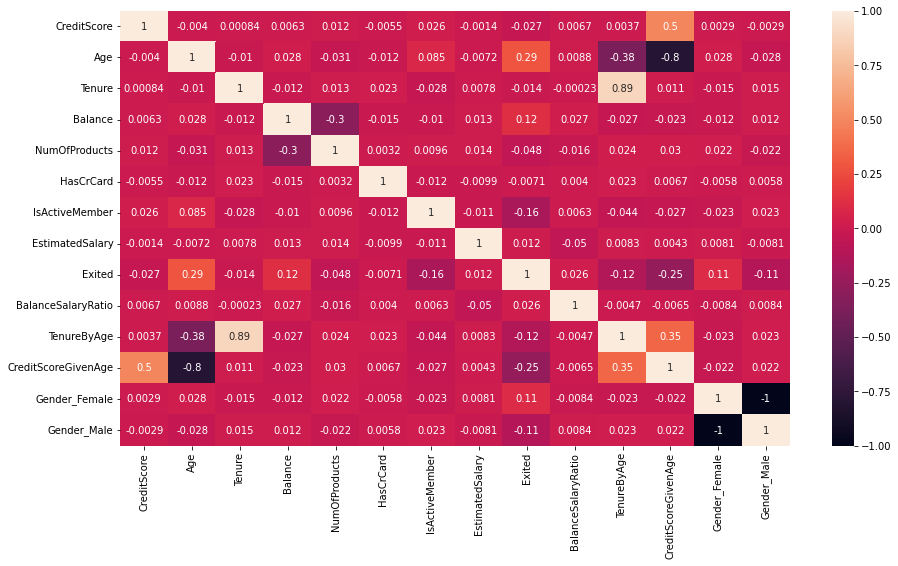

In [316]:
plt.figure(figsize=(15,8))
sns.heatmap(df_fe.corr(),annot=True)
plt.show()

- fokus pada fitur Exited, maka relasi yang cukup tinggi terdapat pada Age dan CreditScoreGivenAge. selain itu, isActiveMember, Balance, TenureByAge, dan Gender juga berpotensi berpengaruh terhadap tingkat churn.

### Visualization

<ipython-input-317-c60f356a2abe>:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax.pie(x=df_fe['Exited'].value_counts().to_frame().T, labels=['no', 'yes'], startangle=90, colors=colors, autopct='%.2f%%', radius=2)


Text(0.5, 1.5, '# Customer Churn')

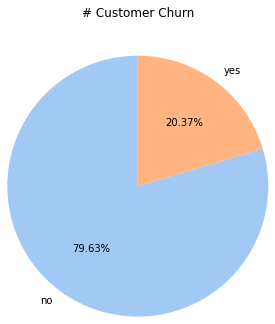

In [317]:
fig, ax = plt.subplots(figsize=(6, 3))
colors = sns.color_palette('pastel')

ax.pie(x=df_fe['Exited'].value_counts().to_frame().T, labels=['no', 'yes'], startangle=90, colors=colors, autopct='%.2f%%', radius=2)
ax.set_title("# Customer Churn", y=1.5)

- Diketahui data yang diperoleh merupakan imbalance data. sehingga diperlukan handling pada data tersebut.
- dikarenakan yang ingin kita prediksi adalah mereka yang churn, maka butuh oversampling terhadap data customer yang churn (minoritas)

merujuk pada corellation matrix, perlu dicek fitur:
- Age 
- CreditScoreGivenAge
- isActiveMember
- Balance
- TenureByAge
- Gender
dan 
- geography

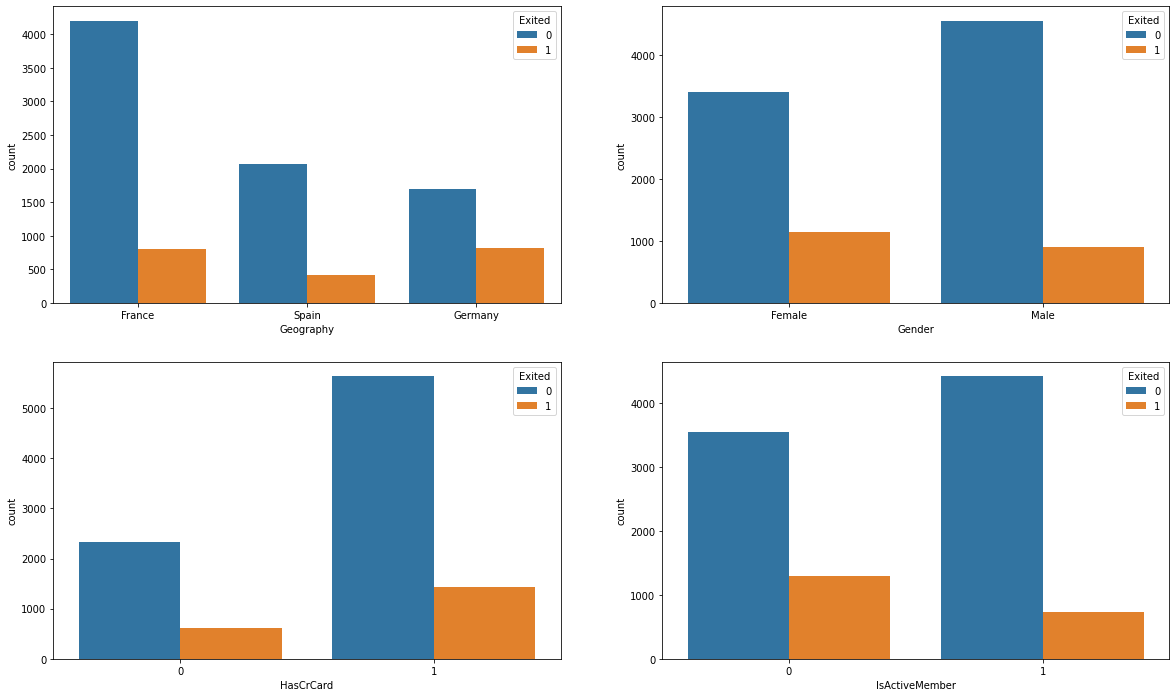

In [318]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

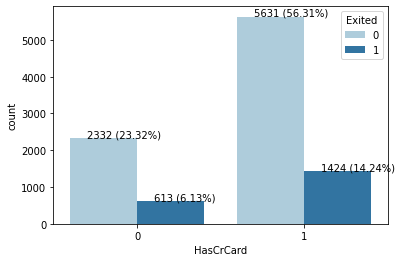

In [319]:
ax = sns.countplot(x=df['HasCrCard'], hue=df['Exited'], palette="Paired")

for p in ax.patches:
  ax.annotate('{:.0f} ({:.2f}%)'.format(p.get_height(), p.get_height()*100/len(df)), (p.get_x()+0.1, p.get_height()+20))

In [320]:
has_0 = 613/(613+2332)
has_1 = 1424/(1424+5631)
print(f'has_0: {has_0}\nhas_1: {has_1}')

has_0: 0.20814940577249574
has_1: 0.20184266477675408


- pada geography, terlihat perancis mendominasi dari pada negara lain, dengan banyaknya pelanggan dari perancis tersebut juga tingkat churn menjadi lebih kecil dibandingkan negara lain.
- sebagai perbandingan, di negara jerman memiliki tingkat churn lebih besar dibandingkan negara lain, hal ini dapat dilihat dari balok orange(churn) yang memiliki proporsi kurang lebih setengah dari balok biru(not churn) pada negara jerman
- Oleh karena itu, fitur geography adalah fitur yang menarik dapat dijadikan sebagai variable independent untuk target.
- pada gender juga terlihat bahwa customer perempuan memiliki tingkat churn lebih tinggi daripada laki-laki sehingga dapat dimasukkan sebagai variable independent
- pada fitur IsActiveMember juga memberikan gambaran tingkat churn yang signifikan pada member yang tidak aktif
- pada fitur HasCrCard, setelah dihitung tingkat churn tidak signifikan antara customer yang memiliki dan tidak memiliki credit card (drop)

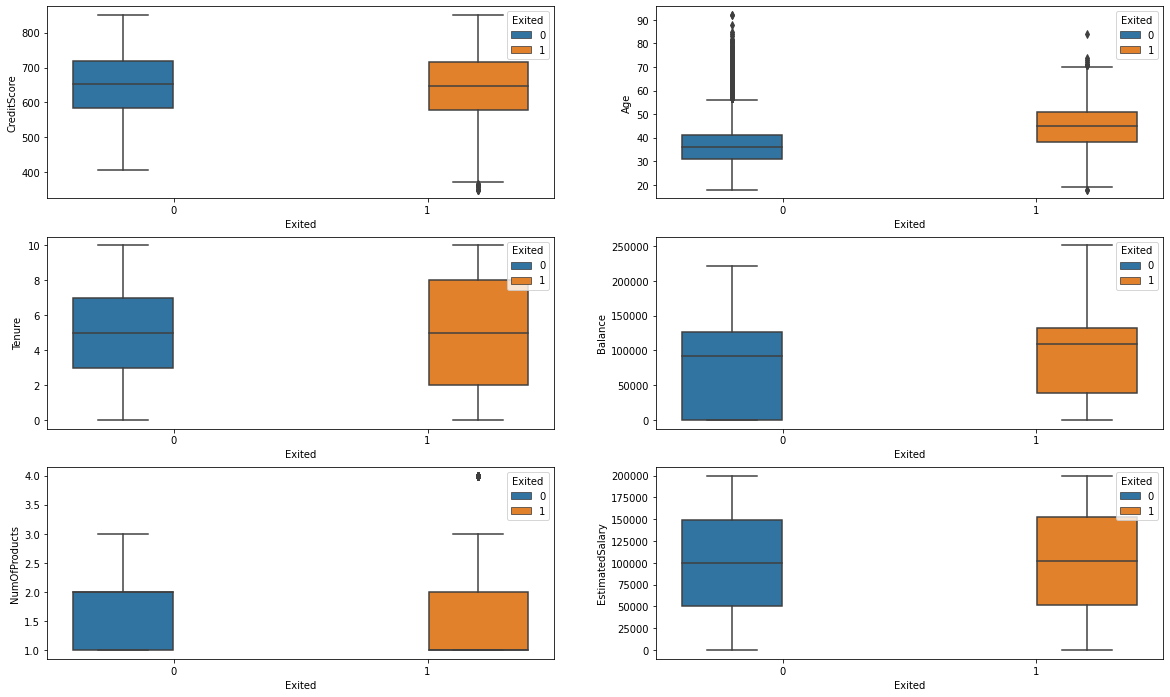

In [321]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

- creditscore terlihat tidak signifikan, namun terdapat outliers pada churn, sehingga bisa dimasukkan pada ML yang kuat terhadap overfitting
- age signifikan, lebih tua umur lebih mudah churn
- tenure cukup signifikan, dimana customer yang menjadi customer cukup baru atau lama lebih mudah churn dibandingkan customer yang berada di rata-rata
- balance cukup signifikan pula, dimana customer yang rata-rata balance nya mencapai batas untuk pinjaman lebih mudah churn
- number of products terlihat tidak signifikan, namun terdapat outliers pada churn, sehingga bisa dimasukkan pada ML yang kuat terhadap overfitting
- estimated salary terlihat tidak signifikan, tetapi tidak pasti karena tidak terlihat angkanya

In [322]:
df_fe.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Gender_Female,Gender_Male
0,619,France,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095,1.0,0.0
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268,1.0,0.0
2,502,France,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381,1.0,0.0
3,699,France,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077,1.0,0.0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442,1.0,0.0


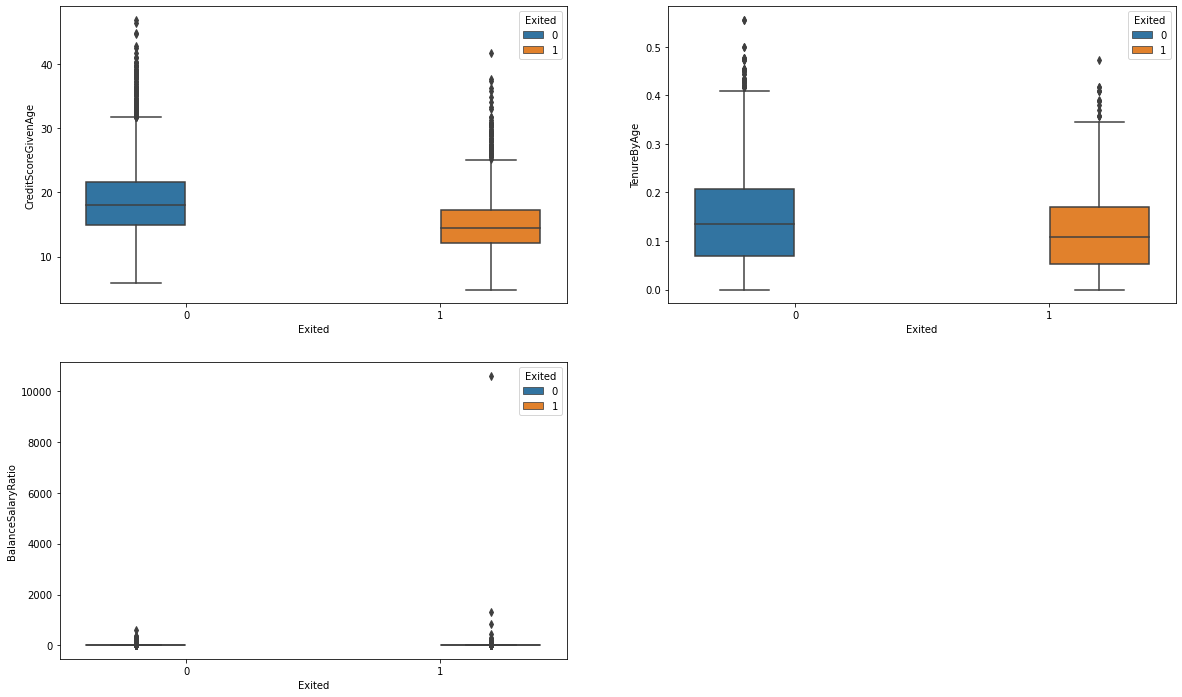

In [323]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.boxplot(y='CreditScoreGivenAge',x = 'Exited', hue = 'Exited',data = df_fe, ax=axarr[0][0])
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df_fe , ax=axarr[0][1])
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df_fe, ax=axarr[1][0])
fig.delaxes(axarr[1][1])

- creditscoregivenage cukup signifikan, dimana customer yang lebih tua dengan creditscore lebih kecil memiliki tingkat churn lebih tinggi daripada customer muda dengan creditscore lebih besar
- tenurebyage cukup signifikan, dimana customer yang lebih tua dan termasuk customer yang baru lebih mudah churn daripada customer muda dan termasuk customer lama
- balance salary ratio terlihat tidak signifikan, namun terdapat outliers sehingga dapat dimasukkan ke ML yang kuat terhadap outliers


Yang didrop:
- has a credit card

In [324]:
df_fe.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Gender_Female,Gender_Male
0,619,France,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095,1.0,0.0
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268,1.0,0.0
2,502,France,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381,1.0,0.0
3,699,France,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077,1.0,0.0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442,1.0,0.0


In [325]:
df_fe.drop(columns=['HasCrCard'], inplace=True)

In [326]:
df_fe.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Gender_Female,Gender_Male
0,619,France,42,2,0.00,1,1,101348.88,1,0.000000,0.047619,14.738095,1.0,0.0
1,608,Spain,41,1,83807.86,1,1,112542.58,0,0.744677,0.024390,14.829268,1.0,0.0
2,502,France,42,8,159660.80,3,0,113931.57,1,1.401375,0.190476,11.952381,1.0,0.0
3,699,France,39,1,0.00,2,0,93826.63,0,0.000000,0.025641,17.923077,1.0,0.0
4,850,Spain,43,2,125510.82,1,1,79084.10,0,1.587055,0.046512,19.767442,1.0,0.0


### Cek Outliers
Selain yg sebelumnya sudah dicek

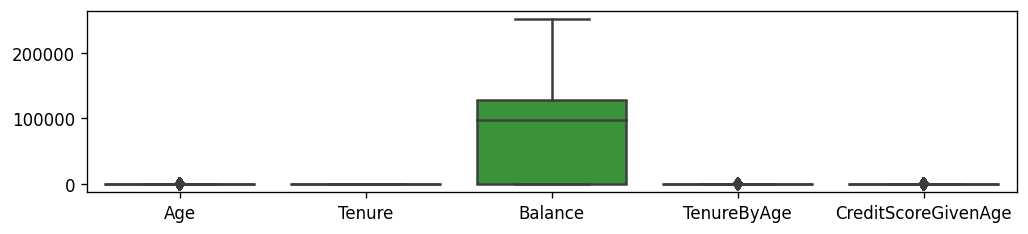

In [327]:
plt.figure(figsize=(10,2), dpi=120)
num_cols = ['Age', 'Tenure', 'Balance', 'TenureByAge', 'CreditScoreGivenAge']
sns.boxplot(data=df_fe[num_cols])

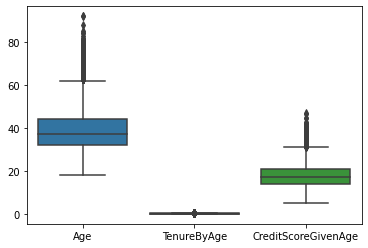

In [328]:
sns.boxplot(data=df_fe[['Age', 'TenureByAge', 'CreditScoreGivenAge']])

- dari hasil pengecekkan outliers, ternyata age dan creditscoregiven age memiliki cukup banyak outliers.
- namun outliers ini perlu dipertimbangkan nantinya, karena dapat juga dimasukkan ke ML yang kuat terhadap outliers

### Encoding

In [329]:
df_fe.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Gender_Female,Gender_Male
0,619,France,42,2,0.00,1,1,101348.88,1,0.000000,0.047619,14.738095,1.0,0.0
1,608,Spain,41,1,83807.86,1,1,112542.58,0,0.744677,0.024390,14.829268,1.0,0.0
2,502,France,42,8,159660.80,3,0,113931.57,1,1.401375,0.190476,11.952381,1.0,0.0
3,699,France,39,1,0.00,2,0,93826.63,0,0.000000,0.025641,17.923077,1.0,0.0
4,850,Spain,43,2,125510.82,1,1,79084.10,0,1.587055,0.046512,19.767442,1.0,0.0


In [330]:
ohe.fit(df_fe[['Geography']])
df_ohe_res = pd.DataFrame(ohe.transform(df_fe[['Geography']]).toarray(), 
                          columns = ohe.get_feature_names_out())
df_fe = pd.concat([df_fe, df_ohe_res], axis=1)
df_fe.drop(columns=['Geography'], inplace=True)

In [331]:
df_fe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,101348.88,1,0.000000,0.047619,14.738095,1.0,0.0,1.0,0.0,0.0
1,608,41,1,83807.86,1,1,112542.58,0,0.744677,0.024390,14.829268,1.0,0.0,0.0,0.0,1.0
2,502,42,8,159660.80,3,0,113931.57,1,1.401375,0.190476,11.952381,1.0,0.0,1.0,0.0,0.0
3,699,39,1,0.00,2,0,93826.63,0,0.000000,0.025641,17.923077,1.0,0.0,1.0,0.0,0.0
4,850,43,2,125510.82,1,1,79084.10,0,1.587055,0.046512,19.767442,1.0,0.0,0.0,0.0,1.0


### Scaling

In [332]:
mms = MinMaxScaler()
df_scal = mms.fit_transform(df_fe)
df_scal = pd.DataFrame(df_scal, columns=df_fe.columns)

In [333]:
df_fe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,101348.88,1,0.000000,0.047619,14.738095,1.0,0.0,1.0,0.0,0.0
1,608,41,1,83807.86,1,1,112542.58,0,0.744677,0.024390,14.829268,1.0,0.0,0.0,0.0,1.0
2,502,42,8,159660.80,3,0,113931.57,1,1.401375,0.190476,11.952381,1.0,0.0,1.0,0.0,0.0
3,699,39,1,0.00,2,0,93826.63,0,0.000000,0.025641,17.923077,1.0,0.0,1.0,0.0,0.0
4,850,43,2,125510.82,1,1,79084.10,0,1.587055,0.046512,19.767442,1.0,0.0,0.0,0.0,1.0


In [334]:
df_scal.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,0.506735,1.0,0.000000,0.085714,0.235083,1.0,0.0,1.0,0.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,1.0,0.562709,0.0,0.000070,0.043902,0.237252,1.0,0.0,0.0,0.0,1.0
2,0.304,0.324324,0.8,0.636357,0.666667,0.0,0.569654,1.0,0.000132,0.342857,0.168807,1.0,0.0,1.0,0.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.469120,0.0,0.000000,0.046154,0.310859,1.0,0.0,1.0,0.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,0.395400,0.0,0.000150,0.083721,0.354739,1.0,0.0,0.0,0.0,1.0


### Train test split

In [335]:
# Split Train, test data
X = df_scal.drop(columns=["Exited"]).copy()
y = df_scal["Exited"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42)
print(len(X_train))
print(len(X_test))

7500
2500


### Resampling

In [336]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

In [337]:
y_train.value_counts()

0.0    5960
1.0    1540
Name: Exited, dtype: int64

In [338]:
y_smote.value_counts()

1.0    5960
0.0    5960
Name: Exited, dtype: int64

### Fit Model

- SVC
- GradientBoostingClassifier
- MLPClassifier

In [339]:
model_list = []
accuracy_list = []
precision_list = []
f1_score_list= []
roc_auc_list = []
recall_list = []

In [340]:
def ML (alg, name_model): #y_train_alg, y_test_alg):
  
  alg_model = alg.fit(X_smote, y_smote)
  print(alg_model)
  y_train_alg = alg_model.predict(X_smote)
  y_test_alg = alg_model.predict(X_test)

  pred(X_smote, y_smote, alg_model, 'Training', name_model, y_train_alg)
  pred(X_test, y_test, alg_model, 'Testing', name_model, y_test_alg)

  accuracy, precision, f1_s, roc_auc_sc, recall = round(accuracy_score(y_test , y_test_alg) , 3),\
  round(precision_score(y_test , y_test_alg) , 3), \
  round(f1_score(y_test , y_test_alg) , 3), \
  round(roc_auc_score(y_test, y_test_alg) , 3),\
  round(recall_score(y_test, y_test_alg), 3)
  
  print(f'Test Accuracy Score is :{accuracy}')
  print(f'Test Precision Score is :{precision}')
  print(f'f1  Score is :{f1_s}')
  print(f'ROC AUC Score is :{roc_auc_sc}')
  print(f'Recall Score is :{recall}')
  model_list.append(name_model)
  accuracy_list.append(accuracy)
  precision_list.append(precision)
  f1_score_list.append(f1_s)
  roc_auc_list.append(roc_auc_sc)
  recall_list.append(recall)
  return(alg_model)

In [341]:
def pred (x_data, y_data, alg_model, type, name_model, y_pred_alg):

  # print classification report
  print('\nClassification Report %s' % type, ' Model:')
  print(classification_report(y_data, y_pred_alg))

  # form confusion matrix as a dataFrame
  confusion_matrix_alg = pd.DataFrame((confusion_matrix(y_data, y_pred_alg)), 
                                      ('Not churn', 'churn'),('Not churn', 'churn'))

  # plot confusion matrix
  plt.figure()
  heatmap = sns.heatmap(confusion_matrix_alg, annot=True, 
                        annot_kws={'size': 14}, fmt='d', cmap='bone_r')
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), 
                               rotation=0, ha='right', fontsize=14)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), 
                               rotation=0, ha='right', fontsize=14)

  plt.title('Confusion Matrix for %s Model \n%s '% (type,name_model), 
            fontsize=18, color='black')
  plt.ylabel('True label', fontsize=14)
  plt.xlabel('Predicted label', fontsize=14)
  plt.show()

SVC(probability=True, random_state=42)

Classification Report Training  Model:
              precision    recall  f1-score   support

         0.0       0.77      0.80      0.79      5960
         1.0       0.79      0.76      0.78      5960

    accuracy                           0.78     11920
   macro avg       0.78      0.78      0.78     11920
weighted avg       0.78      0.78      0.78     11920



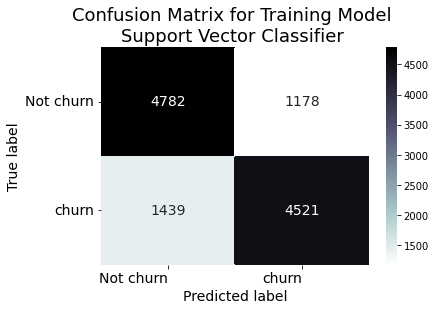


Classification Report Testing  Model:
              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85      2003
         1.0       0.46      0.73      0.56       497

    accuracy                           0.78      2500
   macro avg       0.69      0.76      0.71      2500
weighted avg       0.83      0.78      0.79      2500



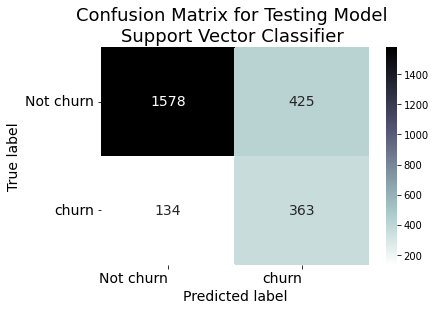

Test Accuracy Score is :0.776
Test Precision Score is :0.461
f1  Score is :0.565
ROC AUC Score is :0.759
Recall Score is :0.73


In [342]:
model_svc = ML(SVC(random_state=42, probability=True), 'Support Vector Classifier')

GradientBoostingClassifier(random_state=42)

Classification Report Training  Model:
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88      5960
         1.0       0.88      0.87      0.87      5960

    accuracy                           0.87     11920
   macro avg       0.87      0.87      0.87     11920
weighted avg       0.87      0.87      0.87     11920



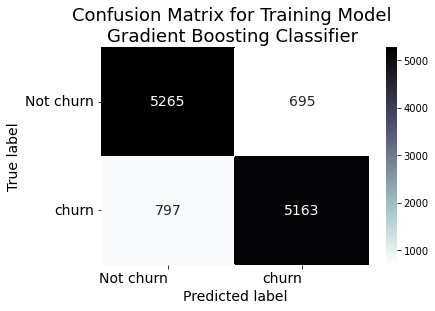


Classification Report Testing  Model:
              precision    recall  f1-score   support

         0.0       0.92      0.87      0.89      2003
         1.0       0.57      0.69      0.62       497

    accuracy                           0.83      2500
   macro avg       0.74      0.78      0.76      2500
weighted avg       0.85      0.83      0.84      2500



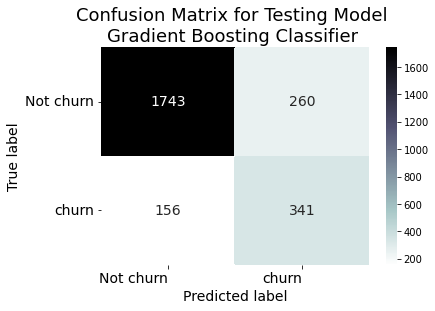

Test Accuracy Score is :0.834
Test Precision Score is :0.567
f1  Score is :0.621
ROC AUC Score is :0.778
Recall Score is :0.686


In [343]:
model_gbc = ML(GradientBoostingClassifier(random_state=42), 'Gradient Boosting Classifier')

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

Classification Report Training  Model:
              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83      5960
         1.0       0.85      0.77      0.81      5960

    accuracy                           0.82     11920
   macro avg       0.82      0.82      0.82     11920
weighted avg       0.82      0.82      0.82     11920



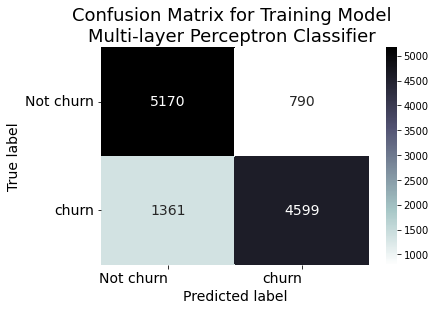


Classification Report Testing  Model:
              precision    recall  f1-score   support

         0.0       0.92      0.85      0.88      2003
         1.0       0.53      0.70      0.60       497

    accuracy                           0.82      2500
   macro avg       0.72      0.77      0.74      2500
weighted avg       0.84      0.82      0.82      2500



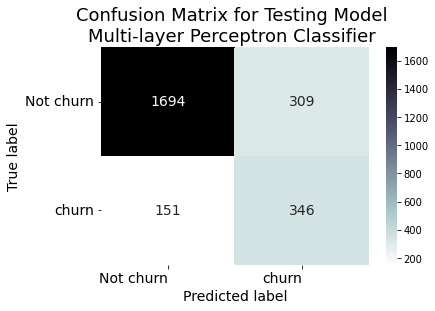

Test Accuracy Score is :0.816
Test Precision Score is :0.528
f1  Score is :0.601
ROC AUC Score is :0.771
Recall Score is :0.696


In [344]:
model_mlpc = ML(MLPClassifier(random_state=42), 'Multi-layer Perceptron Classifier')

### Evaluation

In [345]:
dict = {'Model':model_list, 'Accuracy':accuracy_list , \
        'Precision':precision_list,'f1_score':f1_score_list , \
        'ROC_AUC_score':roc_auc_list, 'recall_score': recall_list}
model_df = pd.DataFrame(dict).sort_values(ascending = False , by = 'recall_score')
model_df

,Model,Accuracy,Precision,f1_score,ROC_AUC_score,recall_score
0,Support Vector Classifier,0.776,0.461,0.565,0.759,0.730
2,Multi-layer Perceptron Classifier,0.816,0.528,0.601,0.771,0.696
1,Gradient Boosting Classifier,0.834,0.567,0.621,0.778,0.686


- karena yang ingin diprediksi adalah customer yang churn, maka penting untuk melihat recall score. dari recall_score tertinggi diperoleh oleh SVC, kedua MLPC, dan ketiga GBC.
- namun jika melihat f1-score sebagai rangkuman ML, maka yang tertinggi adalah GBC, lalu MLPC, dan terakhir SVC
- jika dilihat dari segi akurasi, maka sama seperti peringkat berdasarkan f1-score

In [346]:
def get_auc_scores(y_actual, y_pred, y_proba):
    auc_score = roc_auc_score(y_actual, y_pred); 
    fpr_df, tpr_df, _ = roc_curve(y_actual,  y_proba); 
    return (auc_score, fpr_df, tpr_df)

In [347]:
auc_gbc, fpr_gbc, tpr_gbc = get_auc_scores(y, 
                                           model_gbc.predict(X),
                                           model_gbc.predict_proba(X)[:,1])
auc_mlpc, fpr_mlpc, tpr_mlpc = get_auc_scores(y, 
                                           model_mlpc.predict(X),
                                           model_mlpc.predict_proba(X)[:,1])
auc_svc, fpr_svc, tpr_svc = get_auc_scores(y, 
                                        model_svc.predict(X),
                                        model_svc.predict_proba(X)[:,1])

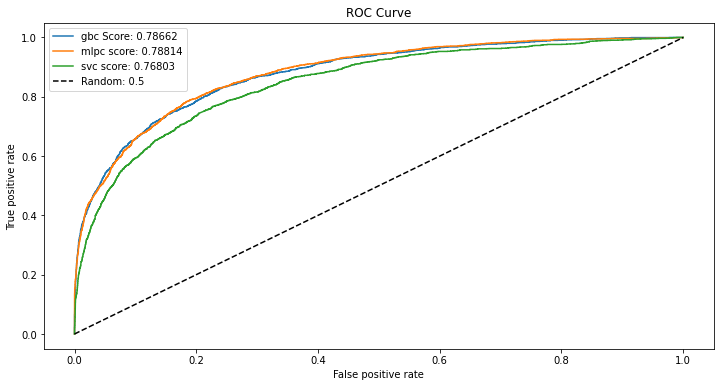

In [348]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_gbc, tpr_gbc, label = 'gbc Score: ' + str(round(auc_gbc, 5)))
plt.plot(fpr_mlpc, tpr_mlpc, label = 'mlpc score: ' + str(round(auc_mlpc, 5)))
plt.plot(fpr_svc, tpr_svc, label = 'svc score: ' + str(round(auc_svc, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

<BarContainer object of 15 artists>

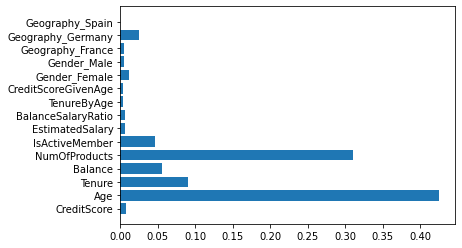

In [349]:
fi = model_gbc.feature_importances_
col = X_train.columns
plt.barh(col, fi)

### Tuning

Keeping all this in mind, we can take the following approach:

- Choose a relatively high learning rate. Generally the default value of 0.1 works but somewhere between 0.05 to 0.2 should work for different problems
- Determine the optimum number of trees for this learning rate. This should range around 40-70. Remember to choose a value on which your system can work fairly fast. This is because it will be used for testing various scenarios and determining the tree parameters.
- Tune tree-specific parameters for decided learning rate and number of trees. Note that we can choose different parameters to define a tree..
- Lower the learning rate and increase the estimators proportionally to get more robust models.

In order to decide on boosting parameters, we need to set some initial values of other parameters. Lets take the following values:

- min_samples_split = 100 : This should be ~0.5-1% of total values.
- min_samples_leaf = 10 : Can be selected based on intuition. This is just used for preventing overfitting and again a small value because of imbalanced classes.
- max_depth = 5 : Should be chosen (5-8) based on the number of observations and predictors. This has 10K rows and 15 columns so lets take 5 here.
- max_features = ‘sqrt’ : Its a general thumb-rule to start with square root.
subsample = 0.8 : This is a commonly used used start value

In [353]:
from sklearn.model_selection import GridSearchCV

In [354]:
param_gbc = {'n_estimators':range(20,81,10)}

In [404]:
grid_gbc = GridSearchCV(GradientBoostingClassifier(learning_rate=0.2, 
                                                   min_samples_split=100,
                                                   min_samples_leaf=10,
                                                   max_depth=8,
                                                   max_features='sqrt',
                                                   subsample=0.8,
                                                   random_state=42),
                        param_gbc,
                        scoring = 'roc_auc',
                        verbose = 3,
                        n_jobs = 10,
                        cv = 5)

In [405]:
grid_gbc.fit(X_smote, y_smote)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.2,
                                                  max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=10,
                                                  min_samples_split=100,
                                                  random_state=42,
                                                  subsample=0.8),
             n_jobs=10, param_grid={'n_estimators': range(20, 81, 10)},
             scoring='roc_auc', verbose=3)

In [406]:
grid_gbc.best_params_, grid_gbc.best_score_

({'n_estimators': 80}, 0.9584238885635783)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.2,
                                                  max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=10,
                                                  min_samples_split=100,
                                                  random_state=42,
                                                  subsample=0.8),
             n_jobs=10, param_grid={'n_estimators': range(20, 81, 10)},
             scoring='roc_auc', verbose=3)

Classification Report Training  Model:
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      5960
         1.0       0.97      0.95      0.96      5960

    accuracy                           0.96     11920
   macro avg       0.96      0.96      0.96     11920
weighted avg  

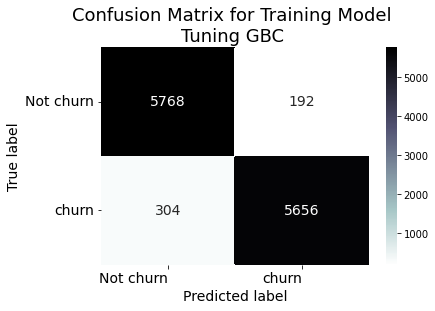


Classification Report Testing  Model:
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      2003
         1.0       0.60      0.60      0.60       497

    accuracy                           0.84      2500
   macro avg       0.75      0.75      0.75      2500
weighted avg       0.84      0.84      0.84      2500



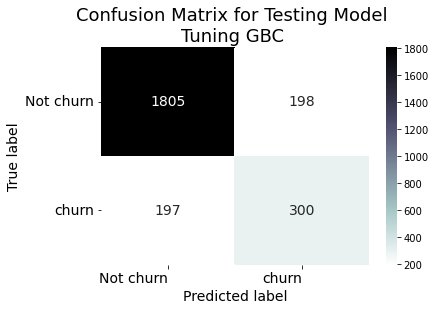

Test Accuracy Score is :0.842
Test Precision Score is :0.602
f1  Score is :0.603
ROC AUC Score is :0.752
Recall Score is :0.604


In [407]:
model_grid = ML(grid_gbc, 'Tuning GBC')

In [403]:
for k, v in dict.items(): v.pop()

In [408]:
dict = {'Model':model_list, 'Accuracy':accuracy_list , \
        'Precision':precision_list,'f1_score':f1_score_list , \
        'ROC_AUC_score':roc_auc_list, 'recall_score': recall_list}
model_df = pd.DataFrame(dict).sort_values(ascending = False , by = 'recall_score')
model_df

,Model,Accuracy,Precision,f1_score,ROC_AUC_score,recall_score
0,Support Vector Classifier,0.776,0.461,0.565,0.759,0.730
2,Multi-layer Perceptron Classifier,0.816,0.528,0.601,0.771,0.696
1,Gradient Boosting Classifier,0.834,0.567,0.621,0.778,0.686
3,Tuning GBC,0.842,0.602,0.603,0.752,0.604


- tuning gbc sudah dilakukan, namun masih belum mendapatkan angka yang diinginkan, dimana setelah dituning akurasi dan presisi meningkat. Akan tetapi, f1-score, roc_auc score, dan recall menurun.
- sehingga diperlukan tuning lebih lanjut